### Let's explore the fundamentals of unsupervised learning and implement the essential algorithms using scikit-learn and SciPy. 

In [42]:
# Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
plt.style.use('ggplot')

# Unsupervised Learning
<p><b>Unsupervised learning is a class of machine learning techniques for discovering patterns in data. For instance, finding the natural "clusters" of customers based on their purchase histories, or searching for patterns and correlations among these purchases, and using these patterns to express the data in a compressed form. These are examples of unsupervised learning techniques called "clustering" and "dimension reduction".</b></p>

In [44]:
# Load Iris Dataset
from sklearn.datasets import load_iris

In [45]:
iris = load_iris()

In [46]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


### Clustering 2D points
<p><b>Let's create a KMeans model to find 3 clusters in Iris dataset. We have 150 rows and will divide into two as this will help us locate cluster labels for some new points</b><p>
<p><u>Please note - we are finding 3 clusters because Iris contains three species of flowers i.e. <b>'setosa', 'versicolor', 'virginica'.</b></u></p>

In [47]:
# Let's shuffle the data before splitting
import random
random.shuffle(iris.data)
random.shuffle(iris.target)

In [48]:
iris_D1 = iris.data[0:60]
iris_D1_T = iris.target[0:60]

In [49]:
iris_D2 = iris.data[60:]
iris_D2_T = iris.target[60:]

In [50]:
# Import KMeans
from sklearn.cluster import KMeans

In [51]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

In [52]:
# Fit model to points
model.fit(iris_D1)

KMeans(n_clusters=3)

In [53]:
# Determine the cluster labels of new_points: labels
labels = model.predict(iris_D2)

<p><b>0: Setosa, 1: Versicolor, 2: Virginica</b></p>

In [54]:
print(labels)

[1 2 1 2 0 1 0 2 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 2 2 1 2 2 2 0 1 1 1 1 0
 2 1 2 2 1 1 1 0 1 1 2 1 1 0 1 0 2 0 1 0 1 0 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 2 1 2 1 2 1 1 2 1 2 2 1]


### Inspect your clustering

In [55]:
# Assign the columns (sepal length & sepal width) of iris_D2: xs and ys
xs = iris_D2[:,0]
ys = iris_D2[:,1]

In [56]:
# Make a scatter plot of xs and ys, using labels to define the colors
# plt.scatter(xs, ys, c=labels, alpha=0.5)
# sns.scatterplot(x=xs, y=ys, hue=labels, palette = 'deep')
# plt.show()

In [57]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

In [58]:
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

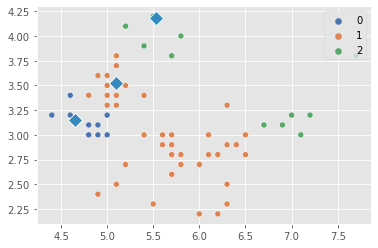

In [59]:
# Make a scatter plot of centroids_x and centroids_y
_ = sns.scatterplot(x=xs, y=ys, hue=labels, palette = 'deep')
_ = sns.scatterplot(x=centroids_x, y=centroids_y, marker='D', s=100)
_ = plt.legend(loc='upper right')
_ = plt.show()

# Evaluating a clustering
<p><b>A direct approach is to compare the clusters with the iris species.</b></p>
<p><b>Let's check whether the 3 clusters of iris samples have any correspondence to the iris species. The correspondence is described by <u>Cross Tabulation</u>. There is one column for each of the three species of iris: setosa, versicolor and virginica, and one row for each of the three cluster labels: 0, 1 and 2. The table shows the number of samples that have each possible cluster label/species combination.</b></p>

In [60]:
species = []
for x in iris_D2_T:
    if x == 0:
        species.append('Setosa')
    elif x == 1:
        species.append('Versicolor')
    else:
        species.append('Virginica')

In [61]:
df = pd.DataFrame({'labels':  labels, 'species': species})

In [62]:
ct = pd.crosstab(df['labels'], df['species'])
ct

species,Setosa,Versicolor,Virginica
labels,,,
0,5,4,5
1,17,18,20
2,7,8,6


<p><b>Cross tabulations like these provide great insights into which sort of samples are in which cluster. But in most datasets, the samples are not labelled by species. How can the quality of a clustering be evaluated in these cases?</b></p>

### Measuring clustering quality
<ol>
    <li>Using only samples and their cluster labels</li>
    <li>A good clustering has tight clusters</li>
    <li>Samples in each cluster bunched together</li>
</ol>

### Inertia measures clustering quality

<ol>
    <li>Measures how spread out the clusters are (lower is better)</li>
    <li>Distance from each sample to centroid of its cluster</li>
    <li>After fit(), available as attribute inertia_</li>
    <li>k-means attempts to minimize the inertia when chosing clusters</li>
</ol>

In [63]:
print("Inertia : {}".format(model.inertia_))

Inertia : 5.726621212121213


### The number of clusters
<ol>
    <li>Clusterings of the iris dataset with different numbers of clusters</li>
    <li>More clusters means lower inertia</li>
    <li>What is the best number of clusters?</li>
<ol>

### How many clusters to choose?
<ol>
<li>A good clustering has tight
    clusters (so low inertia)</li>
    <li>...but not too many clusters!</li>
<li>Choose an "elbow" in the
    inertia plot</li>
<li>Where inertia begins to
    decrease more slowly</li>
<li><b>E.g., for iris dataset, 3 is a
    good choice</b></li>
</ol>

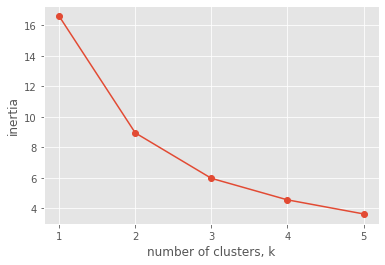

In [64]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(iris_D1)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
_ = plt.plot(ks, inertias, '-o')
_ = plt.xlabel('number of clusters, k')
_ = plt.ylabel('inertia')
_ = plt.xticks(ks)
_ = plt.show()

# Transforming features for better clusterings
<p><b>Let's look now at another dataset, the Piedmont wines dataset. It contains 178 samples of red wine from the Piedmont region of Italy. The features measure chemical composition (like alcohol content) and visual properties like color intensity. The samples come from 3 distinct varieties of wine (Barbera, Barolo and Grignolino).<b><p>

In [65]:
wines_df = pd.read_csv('../Datasets/wine.csv')

In [66]:
wines_df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [67]:
samples = np.array(wines_df.drop(columns=['class_label','class_name']))

In [68]:
# Clustering the wines
wines_model = KMeans(n_clusters=3)
wines_labels = wines_model.fit_predict(samples)

In [69]:
df_wine_ = pd.DataFrame({'wine_label': wines_labels, 'varities': wines_df['class_name']})

In [70]:
wine_ct = pd.crosstab(df_wine_['wine_label'], df_wine_['varities'])
wine_ct

varities,Barbera,Barolo,Grignolino
wine_label,,,
0,29,13,20
1,0,46,1
2,19,0,50


<p><b>The KMeans clusters don't correspond well with the wine varieties.</b></p>

### Feature variances
<ul>
<li>The wine features have very different variances!</li>
<li>Variance of a feature measures spread of its values</li>
    <li><b>For example:</b> the malic acid feature has a higher variance than the od280 feature</li>
</ul>

In [71]:
wines_df.var(numeric_only=True)

class_label                 0.600679
alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64

### StandardScaler
<ul>
    <li>In kmeans: feature variance = feature influence</li>
    <li><u>StandardScaler</u> transforms each feature to have mean 0 and variance 1</li>
    <li>Features are said to be "standardized"</li>
</ul>

In [72]:
# Pipelines combine multiple steps
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

kmeans = KMeans(n_clusters=3)

pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [73]:
new_labels_wine = pipeline.predict(samples)

In [74]:
df_wine_std = pd.DataFrame({'wine_label': new_labels_wine, 'varities': wines_df['class_name']})

In [75]:
wine_ct_std = pd.crosstab(df_wine_std['wine_label'], df_wine_std['varities'])
wine_ct_std

varities,Barbera,Barolo,Grignolino
wine_label,,,
0,0,59,3
1,0,0,65
2,48,0,3


<p><b>Checking the correspondence between the cluster labels and the wine varieties reveals that this new clustering, incorporating standardization, is fantastic. Its three clusters correspond almost exactly to the three wine varieties.</b></p>

# Visualizing hierarchies
<p><b>There are two unsupervised learning techniques for visualization: t-SNE and hierarchical clustering. t-SNE</b></p>

### Visualizations communicate insight
<ol>
    <li>"t-SNE" : Creates a 2D map of a dataset</li>
    <li>"Hierarchical clustering"</li>
 </ol>

### A hierarchy of groups
<p><b>We've already seen many hierarchical clusterings in the real world. For example, living things can be organized into small narrow groups, like humans, apes, snakes and lizards, or into larger, broader groups like mammals and reptiles, or even broader groups like animals and plants. <u>These groups are contained in one another, and form a hierarchy. Analogously, hierarchical clustering arranges samples into a hierarchy of clusters.</u></b></p>

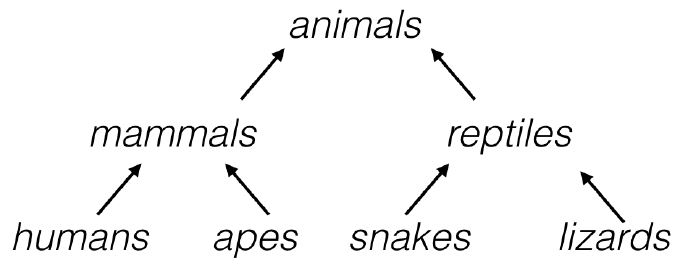

<p><b>Hierarchical clustering can organize any sort of data into a hierarchy, not just samples of plants and animals.</b></p>

<p><b>Let's explore Eurovision scoring dataset,describing how countries scored performances at the Eurovision 2016 song contest.</b></p>

#### Eurovision scoring dataset
<ol>
    <li>Countries gave scores to songs performed at the Eurovision 2016</li>
    <li>2D array of scores</li>
    <li>Rows are countries, columns are songs</li>
</ol>

#### Hierarchical clustering of voting countries
<p><b>The result of applying hierarchical clustering to the Eurovision scores can be visualized as a tree-like diagram called a <u>"dendrogram"</u>.</b></p>

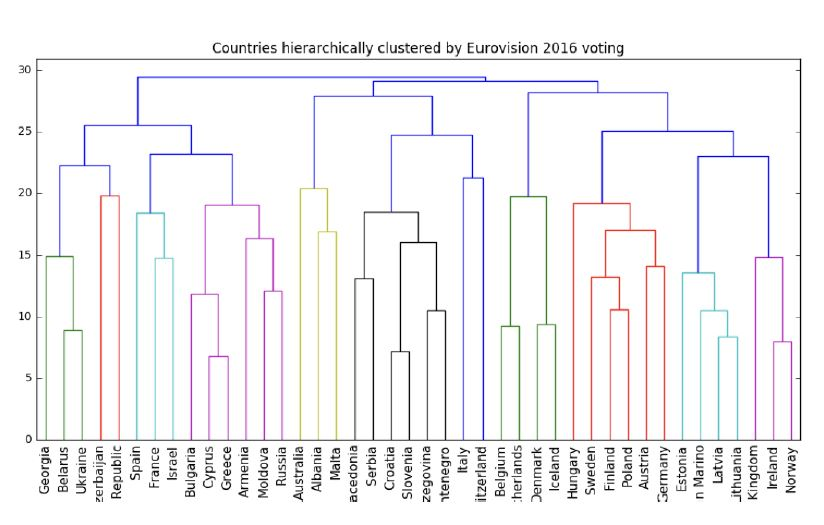

<p><b>This single picture reveals a great deal of information about the voting behavior of countries at the Eurovision. The dendrogram groups the countries into larger and larger clusters, and many of these clusters are immediately recognizable as containing countries that are close to one another geographically, or that have close cultural or political ties, or that belong to single language group. So hierarchical clustering can produce great visualizations.</b></p>
<p><b>Hierarchical clustering proceeds in steps. In the beginning, every country is its own cluster - so there are as many clusters as there are countries! At each step, the two closest clusters are merged. This decreases the number of clusters, and eventually, there is only one cluster left, and it contains all the countries. This process is actually a particular type of hierarchical clustering called "agglomerative clustering" - there is also "divisive clustering", which works the other way around.</b></p>
<p><b>The entire process of the hierarchical clustering is encoded in the dendrogram. At the bottom, each country is in a cluster of its own. The clustering then proceeds from the bottom up. Clusters are represented as vertical lines, and a joining of vertical lines indicates a merging of clusters.</b></p>

### Hierarchical clustering with SciPy
<p><b>SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.</b></p>

In [76]:
seed_samples = [[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]]

In [77]:
seed_samples = np.array(seed_samples)

In [97]:
varieties = [ 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',\
 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',\
 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',\
 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat',\
 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat',\
 'Canadian wheat', 'Canadian wheat','Kama wheat']

In [79]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

In [98]:
# Calculate the linkage: mergings
mergings = linkage(seed_samples, method='complete')

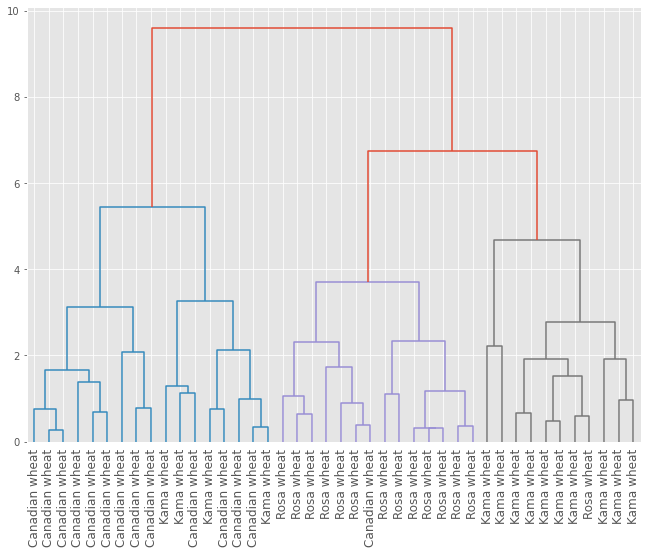

In [99]:
# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(11,8))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=12,
)

plt.show()

# Cluster labels in hierarchical clustering